### References

https://f1000researchdata.s3.amazonaws.com/manuscripts/10712/2ad4387c-cebc-48d1-a9d7-fe50802ff5e5_9501_-__Aaron_Lun_V2.pdf?doi=10.12688/f1000research.9501.2

https://hemberg-lab.github.io/scRNA.seq.course/cleaning-the-expression-matrix.html

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from monty import data

In [42]:
csv_data = pd.read_csv('../resources/PBMC.csv', encoding='utf-8', index_col=0)

In [43]:
csv_data.head(n=10)

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,TTTCAGTGTCACGA,TTTCAGTGTCTATC,TTTCAGTGTGCAGT,TTTCCAGAGGTGAG,TTTCGAACACCTGA,TTTCGAACTCTCAT,TTTCTACTGAGGCA,TTTCTACTTCCTCG,TTTGCATGAGAGGC,TTTGCATGCCTCAC
MIR1302-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP006222.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP4-669L17.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Quality control on the cells

> Low-quality cells need to be removed to ensure that technical effects do not distort downstream analysis results. Two common measures of cell quality are the library size and the number of expressed features in each library. The library size is defined as the total sum of counts across all features, i.e., genes and spike-in transcripts. Cells with relatively small library sizes are considered to be of low quality as the RNA has not been efficiently captured (i.e., converted into cDNA and amplified) during library preparation. The number of expressed features in each cell is defined as the number of features with non-zero counts for that cell. Any cell with very few expressed genes is likely to be of poor quality as the diverse transcript population has not been successfully captured. 

In [44]:
row_sums = csv_data.apply(sum, axis=1)
row_nonzero_counts = csv_data.apply(np.count_nonzero, axis=1)

In [45]:
print(max(row_sums))
print(max(row_nonzero_counts))

161685
2700


[]

2018-09-21 17:15:35,126 DEBUG	[24692] _base _base.py _update_title_position update_title_pos
2018-09-21 17:15:35,200 DEBUG	[24692] _base _base.py _update_title_position update_title_pos
2018-09-21 17:15:35,275 DEBUG	[24692] _base _base.py _update_title_position update_title_pos
2018-09-21 17:15:35,356 DEBUG	[24692] _base _base.py _update_title_position update_title_pos
2018-09-21 17:15:35,419 DEBUG	[24692] _base _base.py _update_title_position update_title_pos


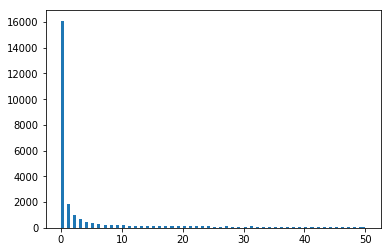

In [46]:
plt.hist(row_sums, range=(0, 50), bins=100)
plt.plot()

[]

2018-09-21 17:15:35,577 DEBUG	[24692] _base _base.py _update_title_position update_title_pos
2018-09-21 17:15:35,646 DEBUG	[24692] _base _base.py _update_title_position update_title_pos
2018-09-21 17:15:35,716 DEBUG	[24692] _base _base.py _update_title_position update_title_pos
2018-09-21 17:15:35,824 DEBUG	[24692] _base _base.py _update_title_position update_title_pos
2018-09-21 17:15:35,892 DEBUG	[24692] _base _base.py _update_title_position update_title_pos


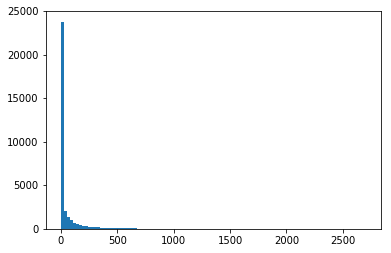

In [47]:
plt.hist(row_nonzero_counts, bins=100)
plt.plot()